<a href="https://colab.research.google.com/github/lukechang93-ucla/MAE-263F/blob/main/homework_2/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Slight modifications to MAE_263F in class example by Professor M. Khalid Jawed.
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output # Only for iPython

#Helper function

In [ ]:
def crossMat(a):
    """
    Returns the cross product matrix of vector 'a'.

    Parameters:
    a : np.ndarray
        A 3-element array representing a vector.

    Returns:
    A : np.ndarray
        The cross product matrix corresponding to vector 'a'.
    """
    A = np.array([[0, -a[2], a[1]],
                  [a[2], 0, -a[0]],
                  [-a[1], a[0], 0]])

    return A

#Gradient and Hessian of elastic energies

In [ ]:
def gradEb(xkm1, ykm1, xk, yk, xkp1, ykp1, curvature0, l_k, EI):
    """
    Returns the derivative of bending energy E_k^b with respect to
    x_{k-1}, y_{k-1}, x_k, y_k, x_{k+1}, and y_{k+1}.

    Parameters:
    xkm1, ykm1 : float
        Coordinates of the previous node (x_{k-1}, y_{k-1}).
    xk, yk : float
        Coordinates of the current node (x_k, y_k).
    xkp1, ykp1 : float
        Coordinates of the next node (x_{k+1}, y_{k+1}).
    curvature0 : float
        Discrete natural curvature at node (xk, yk).
    l_k : float
        Voronoi length of node (xk, yk).
    EI : float
        Bending stiffness.

    Returns:
    dF : np.ndarray
        Derivative of bending energy.
    """

    # Nodes in 3D
    node0 = np.array([xkm1, ykm1, 0.0])
    node1 = np.array([xk, yk, 0])
    node2 = np.array([xkp1, ykp1, 0])

    # Unit vectors along z-axis
    m2e = np.array([0, 0, 1])
    m2f = np.array([0, 0, 1])

    kappaBar = curvature0

    # Initialize gradient of curvature
    gradKappa = np.zeros(6)

    # Edge vectors
    ee = node1 - node0
    ef = node2 - node1

    # Norms of edge vectors
    norm_e = np.linalg.norm(ee)
    norm_f = np.linalg.norm(ef)

    # Unit tangents
    te = ee / norm_e
    tf = ef / norm_f

    # Curvature binormal
    kb = 2.0 * np.cross(te, tf) / (1.0 + np.dot(te, tf))

    chi = 1.0 + np.dot(te, tf)
    tilde_t = (te + tf) / chi
    tilde_d2 = (m2e + m2f) / chi

    # Curvature
    kappa1 = kb[2]

    # Gradient of kappa1 with respect to edge vectors
    Dkappa1De = 1.0 / norm_e * (-kappa1 * tilde_t + np.cross(tf, tilde_d2))
    Dkappa1Df = 1.0 / norm_f * (-kappa1 * tilde_t - np.cross(te, tilde_d2))

    # Populate the gradient of kappa
    gradKappa[0:2] = -Dkappa1De[0:2]
    gradKappa[2:4] = Dkappa1De[0:2] - Dkappa1Df[0:2]
    gradKappa[4:6] = Dkappa1Df[0:2]

    # Gradient of bending energy
    dkappa = kappa1 - kappaBar
    dF = gradKappa * EI * dkappa / l_k

    return dF

In [ ]:
def hessEb(xkm1, ykm1, xk, yk, xkp1, ykp1, curvature0, l_k, EI):
    """
    Returns the Hessian (second derivative) of bending energy E_k^b
    with respect to x_{k-1}, y_{k-1}, x_k, y_k, x_{k+1}, and y_{k+1}.

    Parameters:
    xkm1, ykm1 : float
        Coordinates of the previous node (x_{k-1}, y_{k-1}).
    xk, yk : float
        Coordinates of the current node (x_k, y_k).
    xkp1, ykp1 : float
        Coordinates of the next node (x_{k+1}, y_{k+1}).
    curvature0 : float
        Discrete natural curvature at node (xk, yk).
    l_k : float
        Voronoi length of node (xk, yk).
    EI : float
        Bending stiffness.

    Returns:
    dJ : np.ndarray
        Hessian of bending energy.
    """

    # Nodes in 3D
    node0 = np.array([xkm1, ykm1, 0])
    node1 = np.array([xk, yk, 0])
    node2 = np.array([xkp1, ykp1, 0])

    # Unit vectors along z-axis
    m2e = np.array([0, 0, 1])
    m2f = np.array([0, 0, 1])

    kappaBar = curvature0

    # Initialize gradient of curvature
    gradKappa = np.zeros(6)

    # Edge vectors
    ee = node1 - node0
    ef = node2 - node1

    # Norms of edge vectors
    norm_e = np.linalg.norm(ee)
    norm_f = np.linalg.norm(ef)

    # Unit tangents
    te = ee / norm_e
    tf = ef / norm_f

    # Curvature binormal
    kb = 2.0 * np.cross(te, tf) / (1.0 + np.dot(te, tf))

    chi = 1.0 + np.dot(te, tf)
    tilde_t = (te + tf) / chi
    tilde_d2 = (m2e + m2f) / chi

    # Curvature
    kappa1 = kb[2]

    # Gradient of kappa1 with respect to edge vectors
    Dkappa1De = 1.0 / norm_e * (-kappa1 * tilde_t + np.cross(tf, tilde_d2))
    Dkappa1Df = 1.0 / norm_f * (-kappa1 * tilde_t - np.cross(te, tilde_d2))

    # Populate the gradient of kappa
    gradKappa[0:2] = -Dkappa1De[0:2]
    gradKappa[2:4] = Dkappa1De[0:2] - Dkappa1Df[0:2]
    gradKappa[4:6] = Dkappa1Df[0:2]

    # Compute the Hessian (second derivative of kappa)
    DDkappa1 = np.zeros((6, 6))

    norm2_e = norm_e**2
    norm2_f = norm_f**2

    Id3 = np.eye(3)

    # Helper matrices for second derivatives
    tt_o_tt = np.outer(tilde_t, tilde_t)
    tmp = np.cross(tf, tilde_d2)
    tf_c_d2t_o_tt = np.outer(tmp, tilde_t)
    kb_o_d2e = np.outer(kb, m2e)

    D2kappa1De2 = (2 * kappa1 * tt_o_tt - tf_c_d2t_o_tt - tf_c_d2t_o_tt.T) / norm2_e - \
                  kappa1 / (chi * norm2_e) * (Id3 - np.outer(te, te)) + \
                  (kb_o_d2e + kb_o_d2e.T) / (4 * norm2_e)

    tmp = np.cross(te, tilde_d2)
    te_c_d2t_o_tt = np.outer(tmp, tilde_t)
    tt_o_te_c_d2t = te_c_d2t_o_tt.T
    kb_o_d2f = np.outer(kb, m2f)

    D2kappa1Df2 = (2 * kappa1 * tt_o_tt + te_c_d2t_o_tt + te_c_d2t_o_tt.T) / norm2_f - \
                  kappa1 / (chi * norm2_f) * (Id3 - np.outer(tf, tf)) + \
                  (kb_o_d2f + kb_o_d2f.T) / (4 * norm2_f)
    D2kappa1DeDf = -kappa1 / (chi * norm_e * norm_f) * (Id3 + np.outer(te, tf)) \
                  + 1.0 / (norm_e * norm_f) * (2 * kappa1 * tt_o_tt - tf_c_d2t_o_tt + \
                  tt_o_te_c_d2t - crossMat(tilde_d2))
    D2kappa1DfDe = D2kappa1DeDf.T

    # Populate the Hessian of kappa
    DDkappa1[0:2, 0:2] = D2kappa1De2[0:2, 0:2]
    DDkappa1[0:2, 2:4] = -D2kappa1De2[0:2, 0:2] + D2kappa1DeDf[0:2, 0:2]
    DDkappa1[0:2, 4:6] = -D2kappa1DeDf[0:2, 0:2]
    DDkappa1[2:4, 0:2] = -D2kappa1De2[0:2, 0:2] + D2kappa1DfDe[0:2, 0:2]
    DDkappa1[2:4, 2:4] = D2kappa1De2[0:2, 0:2] - D2kappa1DeDf[0:2, 0:2] - \
                         D2kappa1DfDe[0:2, 0:2] + D2kappa1Df2[0:2, 0:2]
    DDkappa1[2:4, 4:6] = D2kappa1DeDf[0:2, 0:2] - D2kappa1Df2[0:2, 0:2]
    DDkappa1[4:6, 0:2] = -D2kappa1DfDe[0:2, 0:2]
    DDkappa1[4:6, 2:4] = D2kappa1DfDe[0:2, 0:2] - D2kappa1Df2[0:2, 0:2]
    DDkappa1[4:6, 4:6] = D2kappa1Df2[0:2, 0:2]

    # Hessian of bending energy
    dkappa = kappa1 - kappaBar
    dJ = 1.0 / l_k * EI * np.outer(gradKappa, gradKappa)
    dJ += 1.0 / l_k * dkappa * EI * DDkappa1

    return dJ

In [ ]:
def gradEs(xk, yk, xkp1, ykp1, l_k, EA):
    """
    Calculate the gradient of the stretching energy with respect to the coordinates.

    Args:
    - xk (float): x coordinate of the current point
    - yk (float): y coordinate of the current point
    - xkp1 (float): x coordinate of the next point
    - ykp1 (float): y coordinate of the next point
    - l_k (float): reference length
    - EA (float): elastic modulus

    Returns:
    - F (np.array): Gradient array
    """
    F = np.zeros(4)
    F[0] = -(1.0 - np.sqrt((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0) / l_k) * ((xkp1 - xk)**2.0 + (ykp1 - yk)**2.0)**(-0.5) / l_k * (-2.0 * xkp1 + 2.0 * xk)
    F[1] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (-0.2e1 * ykp1 + 0.2e1 * yk)
    F[2] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * xkp1 - 0.2e1 * xk)
    F[3] = -(0.1e1 - np.sqrt((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k) * ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1) / l_k * (0.2e1 * ykp1 - 0.2e1 * yk)

    F = 0.5 * EA * l_k * F  # Scale by EA and l_k

    return F

In [ ]:
def hessEs(xk, yk, xkp1, ykp1, l_k, EA):
    """
    This function returns the 4x4 Hessian of the stretching energy E_k^s with
    respect to x_k, y_k, x_{k+1}, and y_{k+1}.
    """
    J = np.zeros((4, 4))  # Initialize the Hessian matrix
    J11 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * xkp1 + 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J12 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (-2 * ykp1 + 2 * yk) / 0.2e1
    J13 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * xkp1 - 2 * xk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J14 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * xkp1 + 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * xkp1 + 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J22 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((-2 * ykp1 + 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J23 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * xkp1 - 2 * xk) / 0.2e1
    J24 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (-2 * ykp1 + 2 * yk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (-2 * ykp1 + 2 * yk) * (2 * ykp1 - 2 * yk) / 0.2e1 + 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J33 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * xkp1 - 2 * xk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * xkp1 - 2 * xk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k
    J34 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) * (2 * xkp1 - 2 * xk)) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * (2 * xkp1 - 2 * xk) * (2 * ykp1 - 2 * yk) / 0.2e1
    J44 = (1 / ((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) / l_k ** 2 * (2 * ykp1 - 2 * yk) ** 2) / 0.2e1 + (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.3e1 / 0.2e1)) / l_k * ((2 * ykp1 - 2 * yk) ** 2) / 0.2e1 - 0.2e1 * (0.1e1 - np.sqrt(((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2)) / l_k) * (((xkp1 - xk) ** 2 + (ykp1 - yk) ** 2) ** (-0.1e1 / 0.2e1)) / l_k

    J = np.array([[J11, J12, J13, J14],
                   [J12, J22, J23, J24],
                   [J13, J23, J33, J34],
                   [J14, J24, J34, J44]])

    J *= 0.5 * EA * l_k

    return J

# Functions to create elastic force vector and its Hessian

In [ ]:
def getFs(q, EA, deltaL):
  # q - DOF vector of size N
  # EA - stretching stiffness
  # deltaL - undeformed reference length (assume to be a scalar for this simple example)
  # Output:
  # Fs - a vector (negative gradient of elastic stretching force)
  # Js - a matrix (negative hessian of elastic stretching force)

  ndof = q.size # Number of DOFs
  N = ndof // 2 # Number of nodes

  Fs = np.zeros(ndof) # stretching force
  Js = np.zeros((ndof, ndof))

  for k in range(0, N-1):
      # May need to modify if network of beams
      # k-th stretching spring (USE A LOOP for the general case
      xkm1 = q[2*k] # x coordinate of the first node
      ykm1 = q[2*k+1] # y coordinate of the first node
      xk = q[2*k+2] # x coordinate of the second node
      yk = q[2*k+3] # y coordinate of the second node
      ind = np.arange(2*k, 2*k+4) # 0, 1, 2, 3 for k = 0
      gradEnergy = gradEs(xkm1, ykm1, xk, yk, deltaL, EA)
      hessEnergy = hessEs(xkm1, ykm1, xk, yk, deltaL, EA)

      Fs[ind] -= gradEnergy # force = - gradient of energy. Fs is the stretching force
      Js[np.ix_(ind, ind)] -= hessEnergy # index vector: 0:4

  return Fs, Js

In [ ]:
def getFb(q, EI, deltaL):
  # q - DOF vector of size N
  # EI - bending stiffness
  # deltaL - undeformed Voronoi length (assume to be a scalar for this simple example)
  # Output:
  # Fb - a vector (negative gradient of elastic stretching force)
  # Jb - a matrix (negative hessian of elastic stretching force)

  ndof = q.size # Number of DOFs
  N = ndof // 2 # Number of nodes

  Fb = np.zeros(ndof) # bending force
  Jb = np.zeros((ndof, ndof))

  # First bending spring (USE A LOOP for the general case)
  for k in range(1, N-1):
    xkm1 = q[2*k-2] # x coordinate of the first node
    ykm1 = q[2*k-1] # y coordinate of the first node
    xk = q[2*k] # x coordinate of the second node
    yk = q[2*k+1] # y coordinate of the second node
    xkp1 = q[2*k+2] # x coordinate of the third node
    ykp1 = q[2*k+3] # y coordinate of the third node
    ind = np.arange(2*k-2, 2*k+4)
    gradEnergy = gradEb(xkm1, ykm1, xk, yk, xkp1, ykp1, 0, deltaL, EI)
    hessEnergy = hessEb(xkm1, ykm1, xk, yk, xkp1, ykp1, 0, deltaL, EI)

    Fb[ind] -= gradEnergy # force = - gradient of energy. Fb is the stretching force
    Jb[np.ix_(ind, ind)] -= hessEnergy # index vector: 0:6

  return Fb, Jb

# Objective Function or Integrator

Given the old position and the old velocity, find out th new position and the new velocity

In [ ]:
def objfun(q_old, u_old, dt, tol, maximum_iter,
           m, mMat, # inertia
           EI, EA, # elastic stiffness
           W, C, P, # external force
           deltaL,
           free_index):

  q_new = q_old.copy() # Guess solution

  # Newton Raphson
  iter_count = 0 # number of iterations
  error = tol * 10 # error
  flag = 1 # if flag = 1, it is a good solution

  while error > tol:
    # Inertia
    F_inertia = m/dt * ((q_new - q_old) / dt - u_old)
    J_inertia = mMat / dt ** 2

    # Elastic forces: Stretching and Bending
    Fs, Js = getFs(q_new, EA, deltaL)
    Fb, Jb = getFb(q_new, EI, deltaL)
    F_elastic = Fs + Fb
    J_elastic = Js + Jb

    # External forces
    # Viscous force
    Fv = - C @ ( q_new - q_old ) / dt
    Jv = - C / dt

    # Equations of motion
    f = F_inertia - F_elastic - Fv - W - P
    J = J_inertia - J_elastic - Jv

    f_free = f[free_index]
    J_free = J[np.ix_(free_index, free_index)]

    # Newton's update (all DOFs are FREE)
    dq_free = np.linalg.solve(J_free, f_free)
    q_new[free_index] = q_new[free_index] - dq_free

    # Get the error
    error = np.linalg.norm(f_free)

    # Update the iteration number
    iter_count += 1
    if iter_count > maximum_iter:
      flag = -1 # Return with an error signal
      print("Maximum number of iterations reached.")
      return q_new, flag

    # u_new = (q_new - q_old) / dt # Velocity
  return q_new, flag

# Main

In [ ]:
nv = 50 # number of nodes/vertices
ndof = 2 * nv
midNode = nv//2 + 1

# Time step
dt = 0.01 # second

# Rod length
RodLength = 1 # meter
d = .75
l = RodLength

# Discrete length / reference length
deltaL = RodLength / (nv - 1)

# Radii of spheres (given)
R = np.zeros(nv)
for k in range(nv):
  R[k] = deltaL/10 # meter
R[midNode-1] = 0.025 # meter

# Densities
# rho_metal = 7000 # kg/m^3
# rho_gl = 1000
# rho = rho_metal  - rho_gl
rho = 2700 # kg/m^3

# Inner & outer radius
r0 = 11e-3 # meter
r1 = 13e-3 # meter

# Young's modulus
Y = 70e9

# # Viscosity
# visc = 1000.0 # Pa-s

# Maximum number of iterations
maximum_iter = 1000

# Total time
totalTime = 1 # second

# Variables related to plotting
saveImage = 0
plotStep = 100 # Every 5-th step will be plotted

In [ ]:
# Utility quantites
ne = nv - 1 # number of edges
EI = Y * np.pi * (r1**4 - r0**4) / 4
EA = Y * np.pi * (r1**2 - r0**2)

# Tolerance
tol = EI / RodLength ** 2 * 1e-3

# Geometry
nodes = np.zeros((nv, 2))
for c in range(nv):
  nodes[c, 0] = c * deltaL # x-coordinate
  nodes[c, 1] = 0.0 # y-coordinate

# Mass vector and matrix
m = np.zeros( 2 * nv )
for k in range(0, nv):
  m[2*k] = np.pi * (r1**2 - r0**2) * RodLength * rho / (nv - 1) # mass of k-th node along x
  m[2*k + 1] = np.pi * (r1**2 - r0**2) * RodLength * rho / (nv - 1)  # mass of k-th node along y
mMat = np.diag(m)

# Gravity (external force)
W = np.zeros( 2 * nv)
g = np.array([0, -9.8]) # m/s^2
# for k in range(0, nv):
#   W[2*k] = 4.0 / 3.0 * np.pi * R[k]**3 * rho * g[0] # Weight along x
#   W[2*k+1] = 4.0 / 3.0 * np.pi * R[k]**3 * rho * g[1] # Weight along y
# Gradient of W = 0

P_mag = -20000 # N
P = np.zeros( 2 * nv)
P_dist = np.floor(d / (RodLength/nv)).astype(int)
P[P_dist*2+1] = P_mag # force at

# Viscous damping (external force)
C = np.zeros((2 * nv, 2 * nv))
# for k in range(0, nv):
#   C[2*k, 2*k] = 6.0 * np.pi * visc * R[k] # Damping along x for k-th node
#   C[2*k+1, 2*k+1] = 6.0 * np.pi * visc * R[k] # Damping along y for k-th node

# Initial conditions
q0 = np.zeros(2 * nv)
for c in range(nv):
  q0[2*c] = nodes[c, 0] # x coordinate
  q0[2*c+1] = nodes[c, 1] # y coordinate

u0 = np.zeros(2 * nv) # old velocity

**Boundary Conditions**

In this example, the boundary conditions do not change with time and, therefore, we can compute the free_index (corresponding to free DOFs) and fixed_index (corresponding to fixed DOFs) at $t=0$.

In [ ]:
all_DOFs = np.arange(ndof) # Set of all DOFs
fixed_index = np.array([0, 1, nv*2 - 1]) # Fixed DOFs

# Free index
free_index = np.setdiff1d(all_DOFs, fixed_index) # All the DOFs are free except the fixed ones

**Time stepping loop**

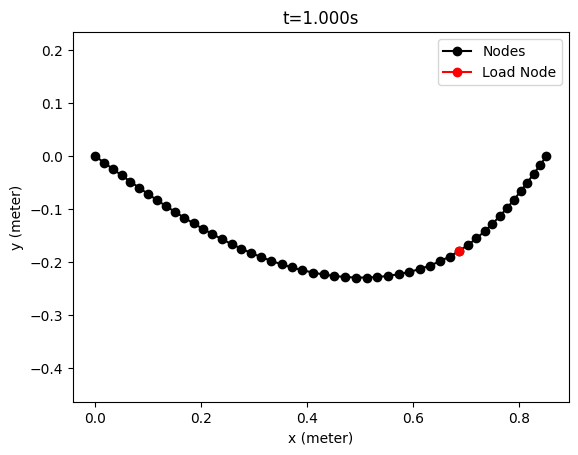

In [ ]:
# Number of steps
Nsteps = round( totalTime / dt )

ctime = 0 # Current time

# Store the y-coordinate of the middle node, its velocity, and the angle
all_pos = np.zeros(Nsteps)
all_vel = np.zeros(Nsteps)
mid_angle = np.zeros(Nsteps)

all_Ymax = np.zeros(Nsteps)

all_pos[0] = 0
all_vel[0] = 0
mid_angle[0] = 0

# Loop over the time steps
for timeStep in range(1,Nsteps):

  q_new, error = objfun(q0, u0, dt, tol, maximum_iter, m, mMat, EI, EA, W, C, P,
                        deltaL, free_index)
  if error < 0:
    print('Could not converge.')
    break

  u_new = (q_new - q0) / dt # New velocity


  ctime += dt # Update current time

  # Save information about the middle node
  all_pos[timeStep] = q_new[2*midNode-1] # y coordinate of middle node
  all_vel[timeStep] = u_new[2*midNode-1] # y velocity of middle node
  vec1 = np.array( [ q_new[2*midNode-2], q_new[2*midNode-1], 0 ] ) - np.array( [ q_new[2*midNode-4], q_new[2*midNode-3], 0 ] ) # Second node - First node
  vec2 = np.array( [ q_new[2*midNode], q_new[2*midNode+1], 0 ] ) - np.array( [ q_new[2*midNode-2], q_new[2*midNode-1], 0 ] ) # Third node - Second node
  mid_angle[timeStep] =  np.degrees( np.arctan2(np.linalg.norm( np.cross(vec1, vec2)), np.dot(vec1, vec2)) )

  all_Ymax[timeStep] = np.min(q_new)

  q0 = q_new.copy() # New position becomes old position
  u0 = u_new.copy() # New velocity becomes old velocity

  ctime = 1

  # Plot
  if timeStep == 1:
    x_arr = q_new[::2] # q[0], q[2], q[4]
    y_arr = q_new[1::2] # q[1], q[3], q[5]

    h1 = plt.figure(1)
    plt.clf() # Clear current figure
    plt.plot(x_arr, y_arr, 'ko-', label = 'Nodes')
    plt.plot(x_arr[P_dist], y_arr[P_dist], 'ro-', label = 'Load Node')
    plt.title(f't={ctime:.3f}s')
    plt.xlabel('x (meter)')
    plt.ylabel('y (meter)')
    plt.axis('equal')
    plt.legend()
    plt.show()

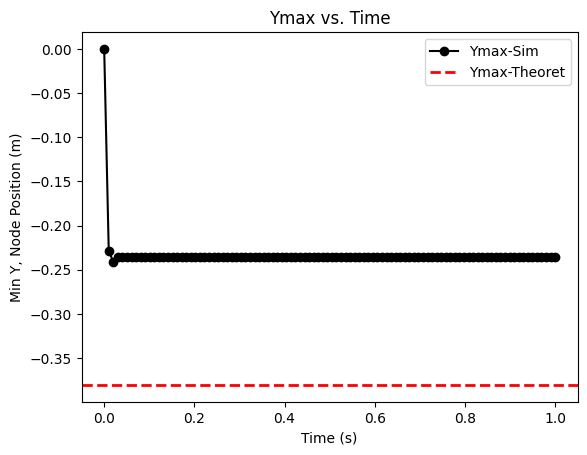

In [ ]:
c = np.min([d, l - d])
y_max_theoret = (P_mag * c * (l**2 - c**2)**1.5) / (9 * 3**.5 * EI * l)

t_arr = np.linspace(0, totalTime, Nsteps)

plt.figure(5)
plt.plot(t_arr, all_Ymax, 'ko-', label = 'Ymax-Sim')
plt.axhline(y = y_max_theoret, color='r', linestyle='--', linewidth=2, label = 'Ymax-Theoret')
plt.xlabel('Time (s)')
plt.ylabel('Min Y, Node Position (m)')
plt.title('Ymax vs. Time')
plt.legend()
plt.show()
if saveImage:
  plt.savefig('min_y_node_position.png')

In [ ]:
all_Ymax[Nsteps-1]

np.float64(-0.23525626521999915)

In [ ]:
y_max_theoret

np.float64(-0.3804491564345031)

In [ ]:
(all_Ymax[Nsteps-1] - y_max_theoret) / all_Ymax[Nsteps-1] * 100

np.float64(-61.71690733878109)

**Varying P Load loop**

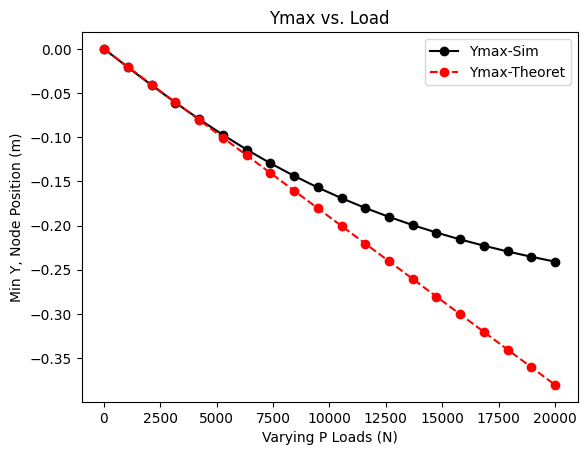

In [ ]:
P_min = 20
P_max = 20000
P_count = 20
P_arr1 = np.linspace(P_min, P_max, num=P_count)
P_arr = np.linspace(-P_min, -P_max, num=P_count)

# Number of steps
Nsteps = round( totalTime / dt )

# Store the y-coordinate of the middle node, its velocity, and the angle
all_Ymax = np.zeros(Nsteps)
P_Ymax = np.zeros(P_count)
y_max_theoret_arr = np.zeros(P_count)

all_pos[0] = 0
all_vel[0] = 0
mid_angle[0] = 0

for p_val in range(1,P_count):
  P = P_arr[p_val]
  y_max_theoret_arr[p_val] = (P * c * (l**2 - c**2)**1.5) / (9 * 3**.5 * EI * l)



for p_val in range(1,P_count):
  P_mag = P_arr[p_val] # N
  P = np.zeros( 2 * nv)
  P_dist = np.floor(d / (RodLength/nv)).astype(int)
  P[P_dist*2+1] = P_mag # force at

  # Initial conditions
  q0 = np.zeros(2 * nv)
  for c in range(nv):
    q0[2*c] = nodes[c, 0] # x coordinate
    q0[2*c+1] = nodes[c, 1] # y coordinate

  u0 = np.zeros(2 * nv) # old velocity

  ctime = 0 # Current time

  # Loop over the time steps
  for timeStep in range(1,Nsteps):

    q_new, error = objfun(q0, u0, dt, tol, maximum_iter, m, mMat, EI, EA, W, C, P,
                          deltaL, free_index)
    if error < 0:
      print('Could not converge.')
      break

    u_new = (q_new - q0) / dt # New velocity
    ctime += dt # Update current time

    all_Ymax[timeStep] = np.min(q_new)

    q0 = q_new.copy() # New position becomes old position
    u0 = u_new.copy() # New velocity becomes old velocity

  P_Ymax[p_val] = np.min(all_Ymax)


plt.figure(6)
plt.plot(P_arr1, P_Ymax, 'ko-', label = 'Ymax-Sim')
plt.plot(P_arr1, y_max_theoret_arr, 'ro--', label = 'Ymax-Theoret')
plt.xlabel('Varying P Loads (N)')
plt.ylabel('Min Y, Node Position (m)')
plt.title('Ymax vs. Load')
plt.legend()
plt.show()
if saveImage:
  plt.savefig('minY_versus_loadP.png')


In [ ]:
P_Ymax

array([ 0.        , -0.02091814, -0.04112741, -0.060736  , -0.07951021,
       -0.09727785, -0.11393001, -0.1294152 , -0.14372888, -0.15690159,
       -0.16898778, -0.18005643, -0.19018378, -0.19944811, -0.20792628,
       -0.21569148, -0.22281197, -0.22935055, -0.23536435, -0.240905  ])

In [ ]:
y_max_theoret_arr

array([ 0.        , -0.02038407, -0.04038768, -0.0603913 , -0.08039491,
       -0.10039853, -0.12040215, -0.14040576, -0.16040938, -0.18041299,
       -0.20041661, -0.22042023, -0.24042384, -0.26042746, -0.28043108,
       -0.30043469, -0.32043831, -0.34044192, -0.36044554, -0.38044916])

In [ ]:
P_arr1

array([   20.        ,  1071.57894737,  2123.15789474,  3174.73684211,
        4226.31578947,  5277.89473684,  6329.47368421,  7381.05263158,
        8432.63157895,  9484.21052632, 10535.78947368, 11587.36842105,
       12638.94736842, 13690.52631579, 14742.10526316, 15793.68421053,
       16845.26315789, 17896.84210526, 18948.42105263, 20000.        ])

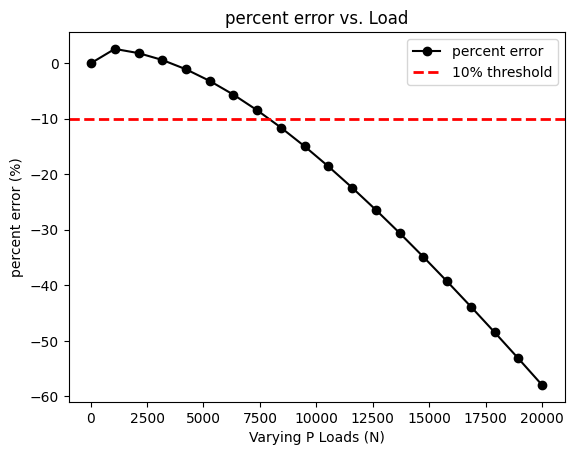

In [ ]:
P_Ymax[0] = 1
y_max_theoret_arr[0] = 1

percent_error = (P_Ymax - y_max_theoret_arr) / P_Ymax * 100

plt.figure(7)
plt.plot(P_arr1, percent_error, 'ko-', label = 'percent error')
plt.xlabel('Varying P Loads (N)')
plt.ylabel('percent error (%)')
plt.title('percent error vs. Load')
plt.axhline(y = -10, color='r', linestyle='--', linewidth=2, label = '10% threshold')
plt.legend()
plt.show()

In [ ]:
# # Plot the middle node information as a function of time
# t_arr = np.linspace(0, totalTime, Nsteps)

# plt.figure(2)
# plt.plot(t_arr, all_pos, 'ko-')
# plt.xlabel('Time (s)')
# plt.ylabel('Middle Node Position (m)')
# plt.title('Middle Node Position vs. Time')
# plt.show()
# if saveImage:
#   plt.savefig('middle_node_position.png')

# plt.figure(3)
# plt.plot(t_arr, all_vel, 'ko-')
# plt.xlabel('Time (s)')
# plt.ylabel('Middle Node Velocity (m/s)')
# plt.title('Middle Node Velocity vs. Time')
# plt.show()
# if saveImage:
#   plt.savefig('middle_node_velocity.png')

# plt.figure(4)
# plt.plot(t_arr, mid_angle, 'ko-')
# plt.xlabel('Time (s)')
# plt.ylabel('Turning angle (degrees)')
# plt.title('Turning angle vs. Time')
# plt.show()
# if saveImage:
#   plt.savefig('turning_angle.png')